<a href="https://colab.research.google.com/github/Innocent-Gershon/linear_regression_model/blob/main/ML_Innocent__Nangah's_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance-factors' dataset.
Path to dataset files: /kaggle/input/student-performance-factors


In [ ]:
#load data and display few rows
path_dir = os.path.join(path, 'StudentPerformanceFactors.csv')
data = pd.read_csv(path_dir)
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
bool_cols = data_encoded.select_dtypes(include=['bool']).columns
for col in bool_cols:
    data_encoded[col] = data_encoded[col].astype(int)

print("Data types of columns after converting boolean to int:")
data_encoded.info()

Data types of columns after converting boolean to int:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Sleep_Hours                            6607 non-null   int64
 3   Previous_Scores                        6607 non-null   int64
 4   Tutoring_Sessions                      6607 non-null   int64
 5   Physical_Activity                      6607 non-null   int64
 6   Exam_Score                             6607 non-null   int64
 7   Parental_Involvement_Low               6607 non-null   int64
 8   Parental_Involvement_Medium            6607 non-null   int64
 9   Access_to_Resources_Low                6607 non-null   int64
 10  Access_to_Resources_Medium             66

In [ ]:
#Handling missing values
missing_values = data.isnull().sum()
print("Missing values before imputation:")
print(missing_values[missing_values > 0])

Missing values before imputation:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


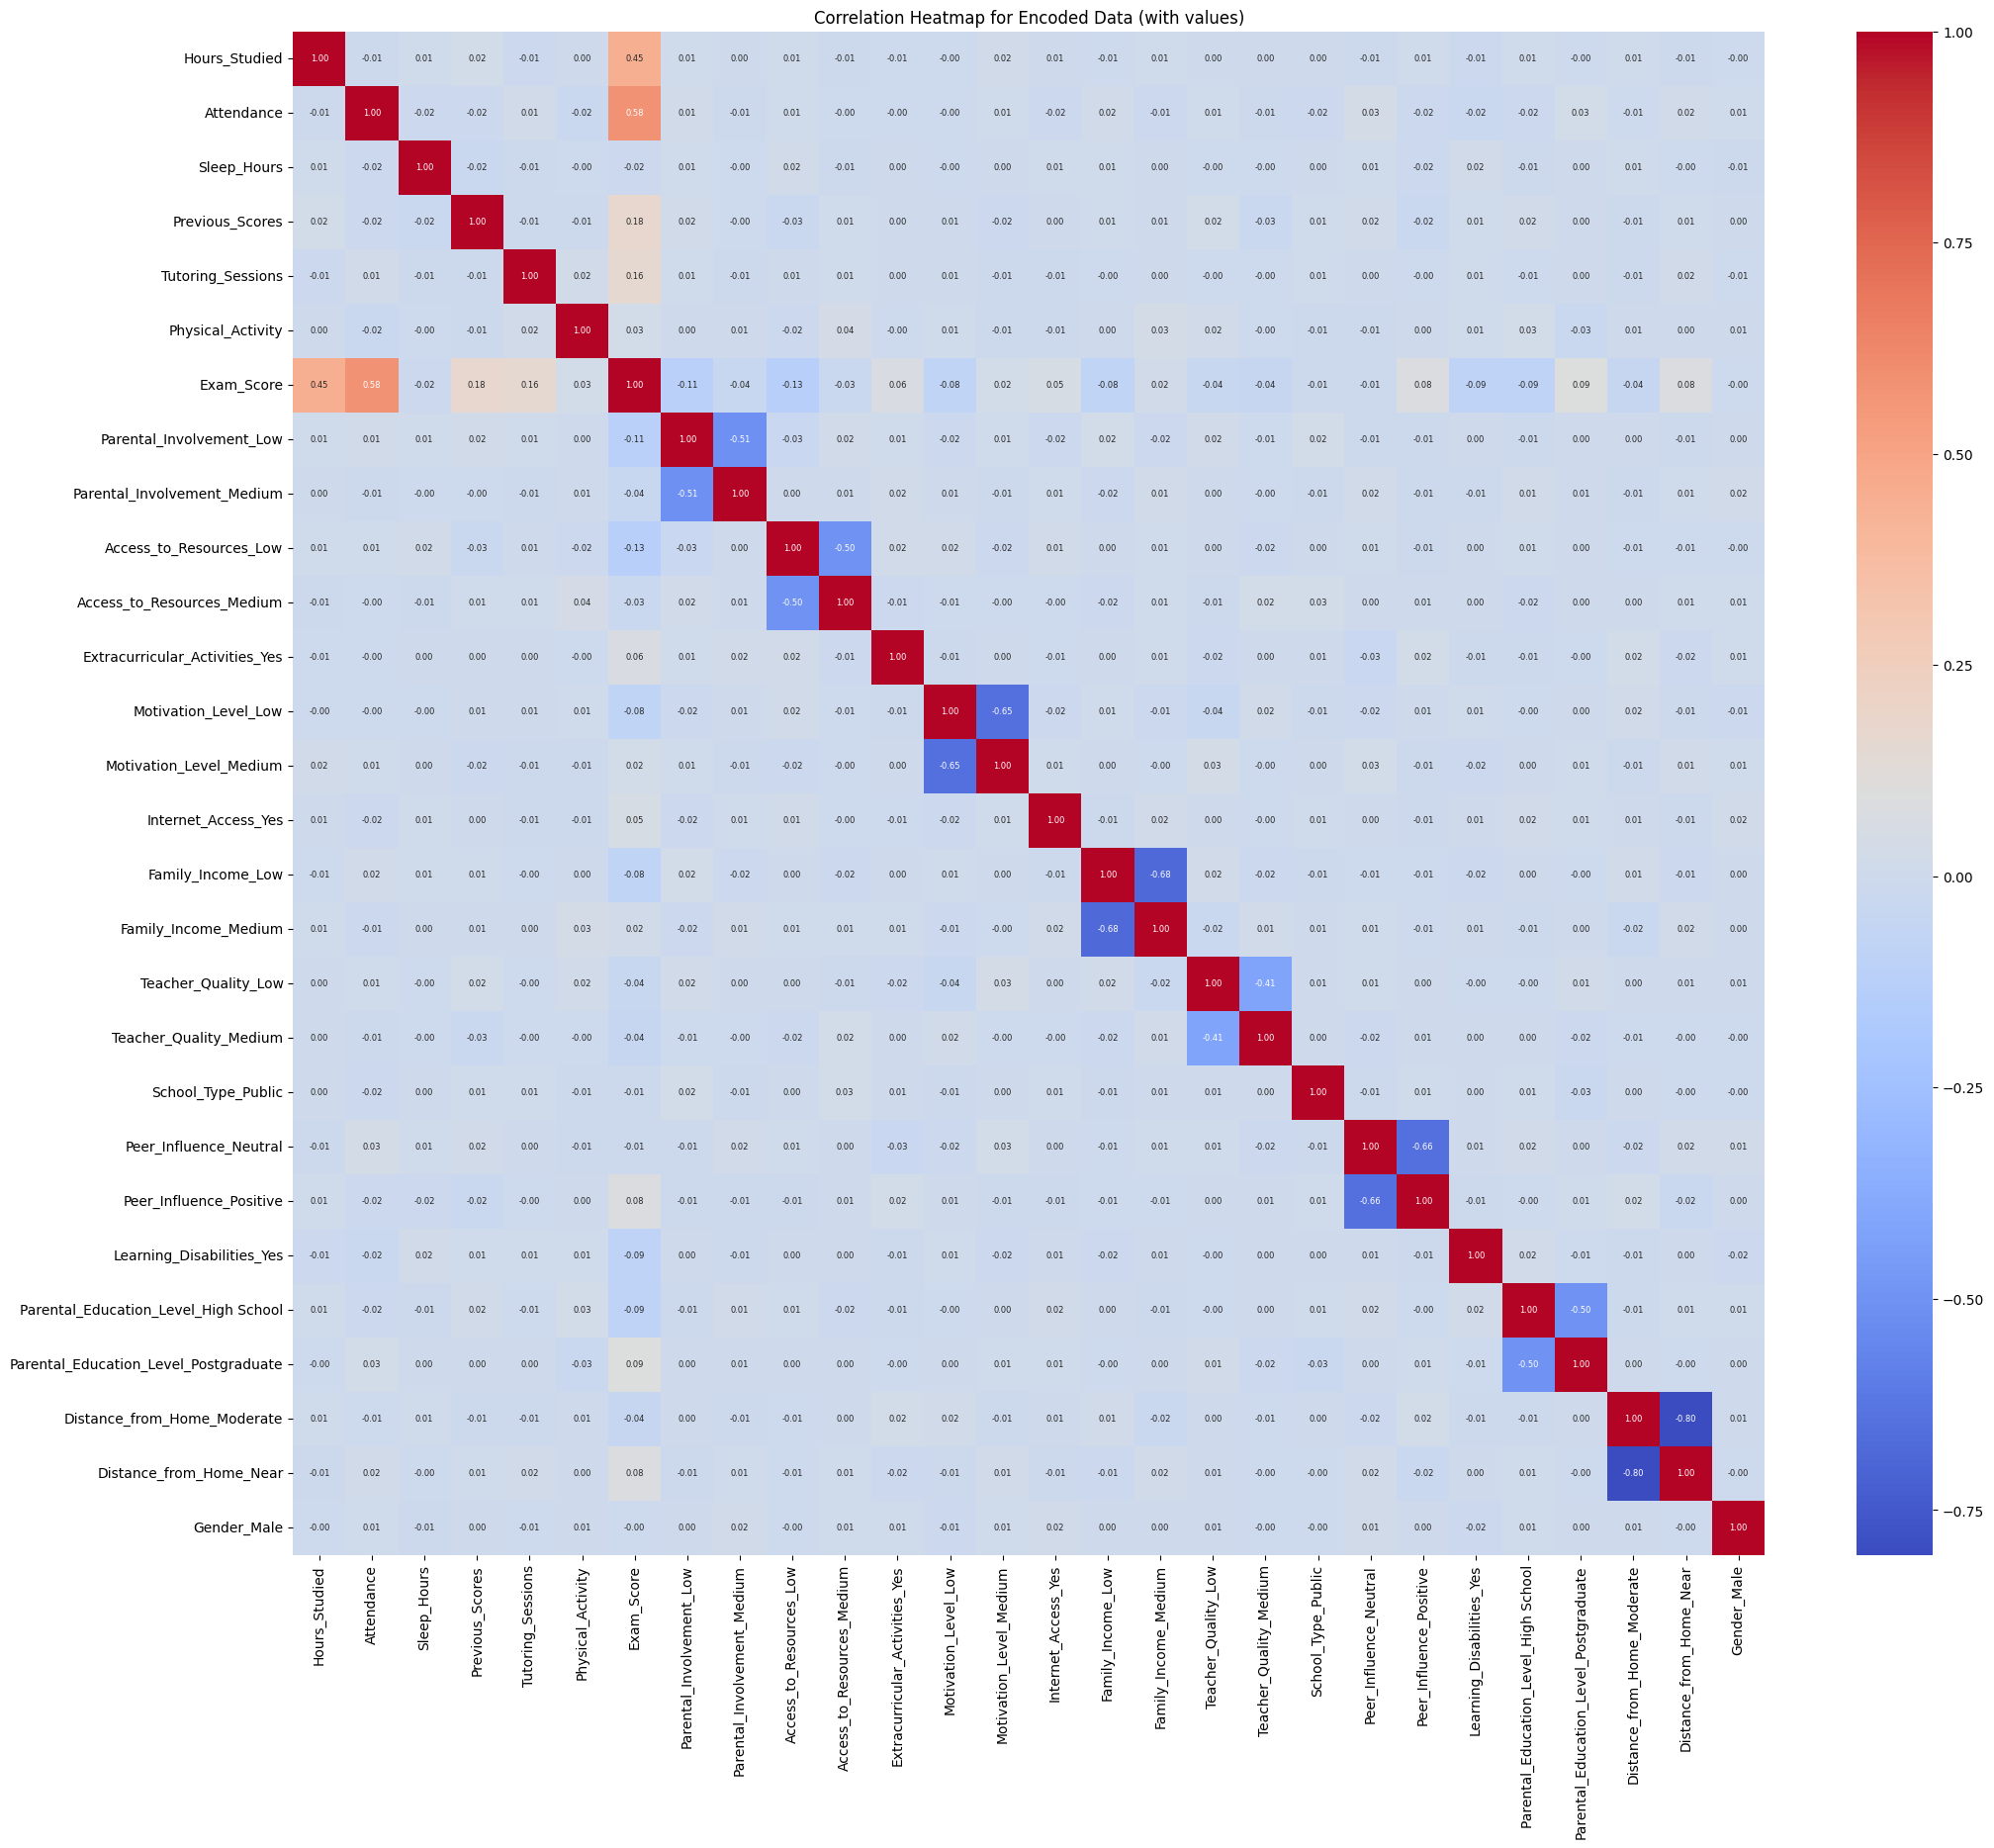

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix using the fully numeric data_encoded DataFrame
corr_matrix_encoded = data_encoded.corr()

plt.figure(figsize=(24,20)) # Further increased figure size for annotations
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 6}) # annot=True to show numbers, smaller font size
plt.title("Correlation Heatmap for Encoded Data (with values)")
plt.show()

In [ ]:
correlation_with_exam_score = corr_matrix_encoded['Exam_Score'].sort_values(ascending=False)
print("Correlation of features with Exam_Score:")
print(correlation_with_exam_score)

Correlation of features with Exam_Score:
Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Peer_Influence_Positive                  0.081217
Distance_from_Home_Near                  0.080933
Extracurricular_Activities_Yes           0.064382
Internet_Access_Yes                      0.051475
Physical_Activity                        0.027824
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Gender_Male                             -0.002032
Peer_Influence_Neutral                  -0.007795
School_Type_Public                      -0.008844
Sleep_Hours                             -0.017022
Access_to_Resources_Medium              -0.026158
Parental_Involvement_Medium             -0.035978
Teacher_Q

In [ ]:
high_corr_pairs = []
for i in range(len(corr_matrix_encoded.columns)): # Iterate over columns
    for j in range(i + 1, len(corr_matrix_encoded.columns)): # Compare with columns to the right
        col1 = corr_matrix_encoded.columns[i]
        col2 = corr_matrix_encoded.columns[j]
        if col1 != 'Exam_Score' and col2 != 'Exam_Score': # Exclude the target variable
            if abs(corr_matrix_encoded.loc[col1, col2]) > 0.8: # Adjust threshold as needed
                high_corr_pairs.append((col1, col2, corr_matrix_encoded.loc[col1, col2]))

if high_corr_pairs:
    print("Highly correlated independent feature pairs (absolute correlation > 0.8):")
    for p in high_corr_pairs:
        print(f"{p[0]} and {p[1]}: {p[2]:.2f}")
else:
    print("No highly correlated independent feature pairs found (absolute correlation > 0.8).")

Highly correlated independent feature pairs (absolute correlation > 0.8):
Distance_from_Home_Moderate and Distance_from_Home_Near: -0.80


In [ ]:
for column in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    if data[column].isnull().any():
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)
        print(f"Missing values in '{column}' filled with mode: {mode_value}")

print("\nMissing values after imputation:")
print(data.isnull().sum())

Missing values in 'Teacher_Quality' filled with mode: Medium
Missing values in 'Parental_Education_Level' filled with mode: High School
Missing values in 'Distance_from_Home' filled with mode: Near

Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


/tmp/ipython-input-3100525286.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


In [ ]:
columns_to_drop = [
    'Gender_Male',
    'Peer_Influence_Neutral',
    'School_Type_Public',
    'Sleep_Hours',
    'Physical_Activity',
    'Motivation_Level_Medium'
]

# Drop the specified columns from data_encoded and create a new DataFrame
data_encoded_dropped = data_encoded.drop(columns=columns_to_drop)

print("Columns dropped successfully. New DataFrame info:")
data_encoded_dropped.info()
print("\nFirst 5 rows of the updated DataFrame:")
display(data_encoded_dropped.head())

Columns dropped successfully. New DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Previous_Scores                        6607 non-null   int64
 3   Tutoring_Sessions                      6607 non-null   int64
 4   Exam_Score                             6607 non-null   int64
 5   Parental_Involvement_Low               6607 non-null   int64
 6   Parental_Involvement_Medium            6607 non-null   int64
 7   Access_to_Resources_Low                6607 non-null   int64
 8   Access_to_Resources_Medium             6607 non-null   int64
 9   Extracurricular_Activities_Yes         6607 non-null   int64
 10  Motivation_Level_Low                   6607 no

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,...,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,73,0,67,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1,19,64,59,2,61,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,24,98,91,2,74,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
3,29,89,98,1,71,1,0,0,1,1,...,0,1,0,1,0,0,1,0,1,0
4,19,92,65,3,70,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
X = data_encoded_dropped.drop('Exam_Score', axis=1)
y = data_encoded_dropped['Exam_Score']

In [ ]:
from sklearn.preprocessing import StandardScaler

# All columns in X (after dropping 'Exam_Score' from data_encoded_dropped) are now numerical.
# We can directly apply the scaler to all columns in X.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame with original column names
X = pd.DataFrame(X_scaled, columns=X.columns)

print("Features (X) after scaling:")
display(X.head())

Features (X) after scaling:


,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Low,...,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near
0,0.504942,0.348375,-0.143800,-1.213934,1.985362,-1.017868,-0.498013,-1.004703,-1.214685,1.552722,...,1.213540,-0.822483,-0.332295,0.806543,1.226601,-0.342867,0.997128,-0.496118,-0.658407,0.819899
1,-0.162822,-1.383736,-1.116110,0.411451,1.985362,-1.017868,-0.498013,0.995319,-1.214685,1.552722,...,-0.824035,1.215831,-0.332295,0.806543,-0.815261,-0.342867,-1.002880,-0.496118,1.518818,-1.219662
2,0.671882,1.560853,1.106313,0.411451,-0.503687,0.982446,-0.498013,0.995319,0.823259,-0.644030,...,-0.824035,1.215831,-0.332295,0.806543,-0.815261,-0.342867,-1.002880,2.015648,-0.658407,0.819899
3,1.506587,0.781403,1.592469,-0.401242,1.985362,-1.017868,-0.498013,0.995319,0.823259,-0.644030,...,-0.824035,1.215831,-0.332295,0.806543,-0.815261,-0.342867,0.997128,-0.496118,1.518818,-1.219662
4,-0.162822,1.041220,-0.699406,1.224144,-0.503687,0.982446,-0.498013,0.995319,0.823259,-0.644030,...,-0.824035,1.215831,-0.332295,-1.239859,-0.815261,-0.342867,-1.002880,-0.496118,-0.658407,0.819899


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize linear regression
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [ ]:
# Training performance
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing performance
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

Train MSE: 4.47, R²: 0.71
Test MSE: 3.34, R²: 0.76


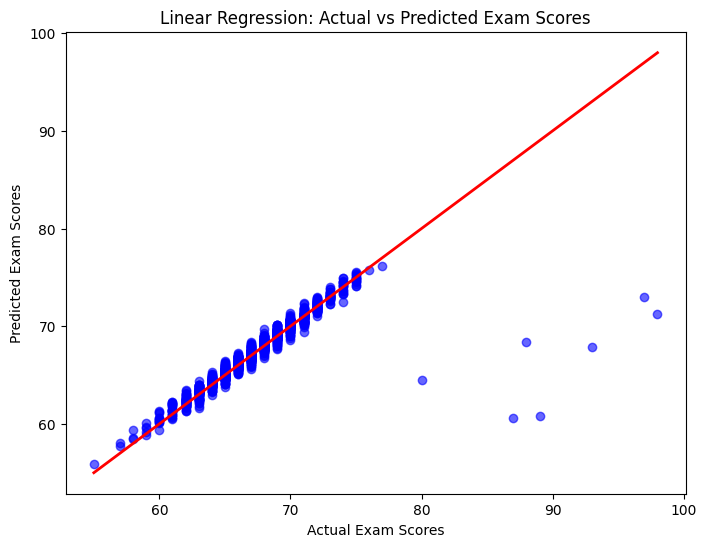

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Linear Regression: Actual vs Predicted Exam Scores')
plt.show()

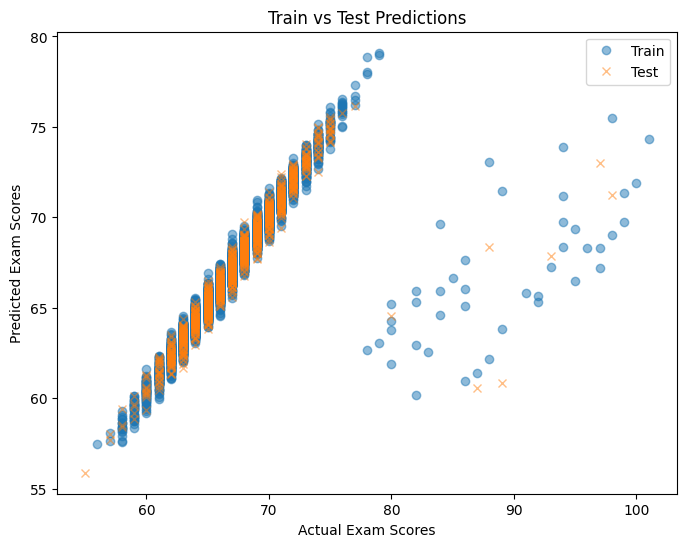

In [ ]:
#Plot train vs test loss curve
plt.figure(figsize=(8,6))
plt.plot(y_train, y_train_pred, 'o', label='Train', alpha=0.5)
plt.plot(y_test, y_test_pred, 'x', label='Test', alpha=0.5)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Train vs Test Predictions')
plt.legend()
plt.show()

In [ ]:
import pickle

# Save the trained model to a file
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [ ]:
# Create the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#Make Predictions
dt_predictions = dt_model.predict(X_test)

In [ ]:
#Evaluate the Model
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Regression Performance:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R² Score:", dt_r2)


Decision Tree Regression Performance:
MAE: 1.7420574886535551
MSE: 11.483358547655069
RMSE: 3.388710454974734
R² Score: 0.18759818391135885


In [ ]:
import pandas as pd
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                                  Feature  Importance
1                              Attendance    0.389692
0                           Hours_Studied    0.257771
2                         Previous_Scores    0.095848
3                       Tutoring_Sessions    0.046961
11                      Family_Income_Low    0.028096
4                Parental_Involvement_Low    0.024251
7              Access_to_Resources_Medium    0.021055
6                 Access_to_Resources_Low    0.018941
15                Peer_Influence_Positive    0.016891
17   Parental_Education_Level_High School    0.012984
18  Parental_Education_Level_Postgraduate    0.011960
8          Extracurricular_Activities_Yes    0.011424
9                    Motivation_Level_Low    0.010539
5             Parental_Involvement_Medium    0.010298
20                Distance_from_Home_Near    0.009986
16              Learning_Disabilities_Yes    0.009696
14                 Teacher_Quality_Medium    0.007192
12                   Family_

In [ ]:
#Save the Decision Tree Model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)


In [ ]:
#Create and Train the Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    random_state=42,
    max_depth=None,       # tree depth (None = grow fully)
    n_jobs=-1             # use all CPU cores
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
#Make Predictions
rf_predictions = rf_model.predict(X_test)


In [ ]:
#Evaluate the Model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression Performance:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)

Random Forest Regression Performance:
MAE: 1.1320461422087746
MSE: 4.813246577155824
RMSE: 2.1939112509752587
R² Score: 0.6594820022089862


In [ ]:
#Feature Importance
import pandas as pd

rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_feature_importance)

                                  Feature  Importance
1                              Attendance    0.389576
0                           Hours_Studied    0.256686
2                         Previous_Scores    0.105774
3                       Tutoring_Sessions    0.044478
4                Parental_Involvement_Low    0.021503
6                 Access_to_Resources_Low    0.019740
15                Peer_Influence_Positive    0.014991
7              Access_to_Resources_Medium    0.014123
9                    Motivation_Level_Low    0.013324
18  Parental_Education_Level_Postgraduate    0.012849
16              Learning_Disabilities_Yes    0.012182
5             Parental_Involvement_Medium    0.012062
11                      Family_Income_Low    0.011780
17   Parental_Education_Level_High School    0.011450
14                 Teacher_Quality_Medium    0.010983
8          Extracurricular_Activities_Yes    0.010622
20                Distance_from_Home_Near    0.010108
12                   Family_

In [ ]:
#Save the Model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
# Calculate MAE and RMSE for Linear Regression
lr_mae = mean_absolute_error(y_test, y_test_pred)
lr_rmse = np.sqrt(mse_test)

# Create a Comparison Table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [lr_mae, dt_mae, rf_mae],
    'MSE': [mse_test, dt_mse, rf_mse],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse],
    'R\u00b2 Score': [r2_test, dt_r2, rf_r2]
})

print("\nModel Comparison Table:")
print(comparison_df)


Model Comparison Table:
               Model       MAE        MSE      RMSE  R² Score
0  Linear Regression  0.551925   3.338215  1.827078  0.763835
1      Decision Tree  1.742057  11.483359  3.388710  0.187598
2      Random Forest  1.132046   4.813247  2.193911  0.659482


In [ ]:
#Sort by best performance
comparison_df_sorted = comparison_df.sort_values(by='RMSE')
print("\nSorted by Best Performance (Lower RMSE = Better):")
print(comparison_df_sorted)


Sorted by Best Performance (Lower RMSE = Better):
               Model       MAE        MSE      RMSE  R² Score
0  Linear Regression  0.551925   3.338215  1.827078  0.763835
2      Random Forest  1.132046   4.813247  2.193911  0.659482
1      Decision Tree  1.742057  11.483359  3.388710  0.187598


In [ ]:
#Save as CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)

## Add Mission and Data Description

### Subtask:
Create a Markdown cell at the beginning of the notebook to state your mission clearly and provide a brief description of the dataset, including its source (Kaggle).


## Mission

The mission of this notebook is to develop and evaluate machine learning models to predict student exam scores based on various academic and socio-economic factors.

## Data Description

This dataset, sourced from Kaggle (`lainguyn123/student-performance-factors`), contains information about factors influencing student performance. The primary file used in this analysis is `StudentPerformanceFactors.csv`. It includes features such as hours studied, attendance, parental involvement, access to resources, and other relevant attributes, with the goal of predicting the `Exam_Score`.

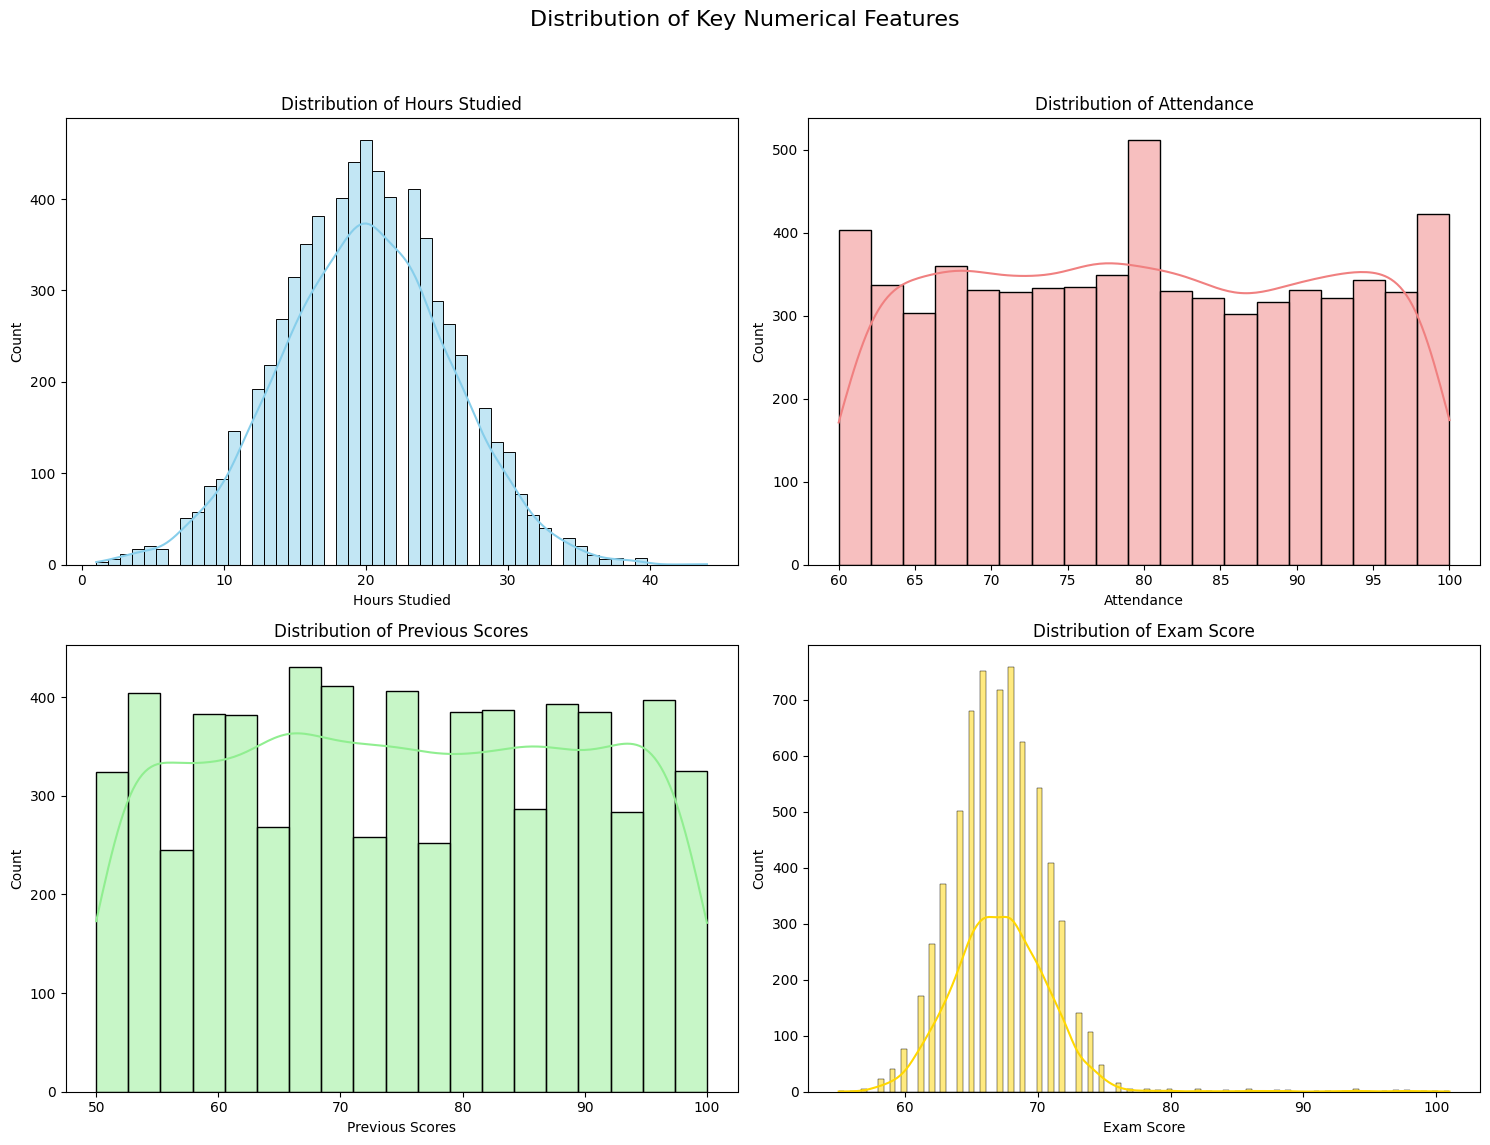

In [ ]:
#Add Data Distribution Visualizations

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)

sns.histplot(data['Hours_Studied'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Hours Studied')
axes[0, 0].set_xlabel('Hours Studied')

sns.histplot(data['Attendance'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Attendance')
axes[0, 1].set_xlabel('Attendance')

sns.histplot(data['Previous_Scores'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Previous Scores')
axes[1, 0].set_xlabel('Previous Scores')

sns.histplot(data['Exam_Score'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Exam Score')
axes[1, 1].set_xlabel('Exam Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

In [ ]:
#Implement Linear Regression with Gradient Descent
from sklearn.linear_model import SGDRegressor


# Initialize SGDRegressor
sgd_model = SGDRegressor(
    max_iter=1000,
    eta0=0.01, # Learning rate
    random_state=42,
    learning_rate='constant' # Use a constant learning rate
)

# Train the model
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)

# Evaluate the Model
sgd_mae = mean_absolute_error(y_test, sgd_predictions)
sgd_mse = mean_squared_error(y_test, sgd_predictions)
sgd_rmse = np.sqrt(sgd_mse)
sgd_r2 = r2_score(y_test, sgd_predictions)

print("SGDRegressor Performance:")
print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print("R² Score:", sgd_r2)

SGDRegressor Performance:
MAE: 0.8685698390578885
MSE: 3.7888412847324497
RMSE: 1.946494614616863
R² Score: 0.7319545908268439


In [ ]:
#Save SGDRegressor model

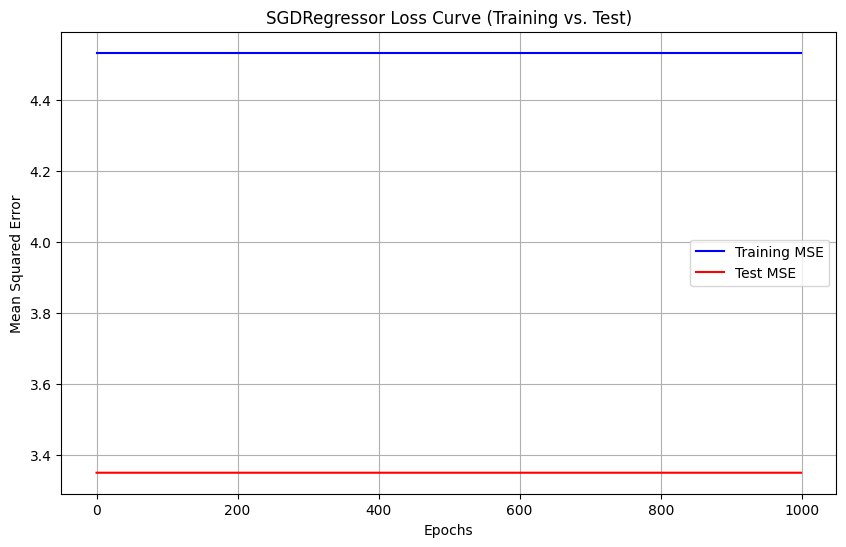

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Initialize a new SGDRegressor for iterative training to record loss
sgd_model_iterative = SGDRegressor(
    max_iter=1, # Train for one iteration at a time
    eta0=0.01,
    random_state=42,
    learning_rate='constant',
    warm_start=True # Keep the model parameters from previous calls to fit
)

train_losses = []
test_losses = []

# Define the number of epochs (iterations)
n_epochs = 1000

for epoch in range(n_epochs):
    # Perform one step of gradient descent
    sgd_model_iterative.partial_fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred_epoch = sgd_model_iterative.predict(X_train)
    y_test_pred_epoch = sgd_model_iterative.predict(X_test)

    # Calculate MSE and store
    train_losses.append(mean_squared_error(y_train, y_train_pred_epoch))
    test_losses.append(mean_squared_error(y_test, y_test_pred_epoch))

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_losses, label='Training MSE', color='blue')
plt.plot(range(n_epochs), test_losses, label='Test MSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('SGDRegressor Loss Curve (Training vs. Test)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Take a single row from the preprocessed test set (e.g., the first row)
single_data_point = X_test.iloc[[0]]

# Make a prediction using the best-performing model (lr_model)
predicted_score = lr_model.predict(single_data_point)

# Print the actual and predicted scores
actual_score = y_test.iloc[0]

print(f"Single Data Point Prediction:")
print(f"  Actual Exam Score: {actual_score:.2f}")
print(f"  Predicted Exam Score: {predicted_score[0]:.2f}")

Single Data Point Prediction:
  Actual Exam Score: 65.00
  Predicted Exam Score: 64.12
